In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from random import randint
import gzip
from scipy.io import mmread




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pyg-nightly
!pip install scipy==1.8.1
!pip install -q grpcio

The graph is created from the facebook dataframe of the edges:

In [ ]:
import networkx as nx

G = nx.Graph()
file_path = '/content/drive/MyDrive/Colab Notebooks/WebSocialAssessment/Graph Datasets/tech-routers-rf.mtx'

with open(file_path, 'r') as file:
    for line in file:
        if line.startswith('%') or not line.strip():  # Skip headers or empty lines
            continue

        parts = line.strip().split()
        if len(parts) >= 2:  # Basic validation
            G.add_edge(parts[0], parts[1])

#print(nx.info(G))


In [ ]:
#G = nx.from_pandas_edgelist(facebook, "start_node", "end_node")

n = len(G)
m = len(G.edges())
n, m


(2113, 6633)

Visualizing the graph

Since we don’t have any real sense of structure in the data, let’s start by viewing the graph with random_layout, which is among the fastest of the layout functions.

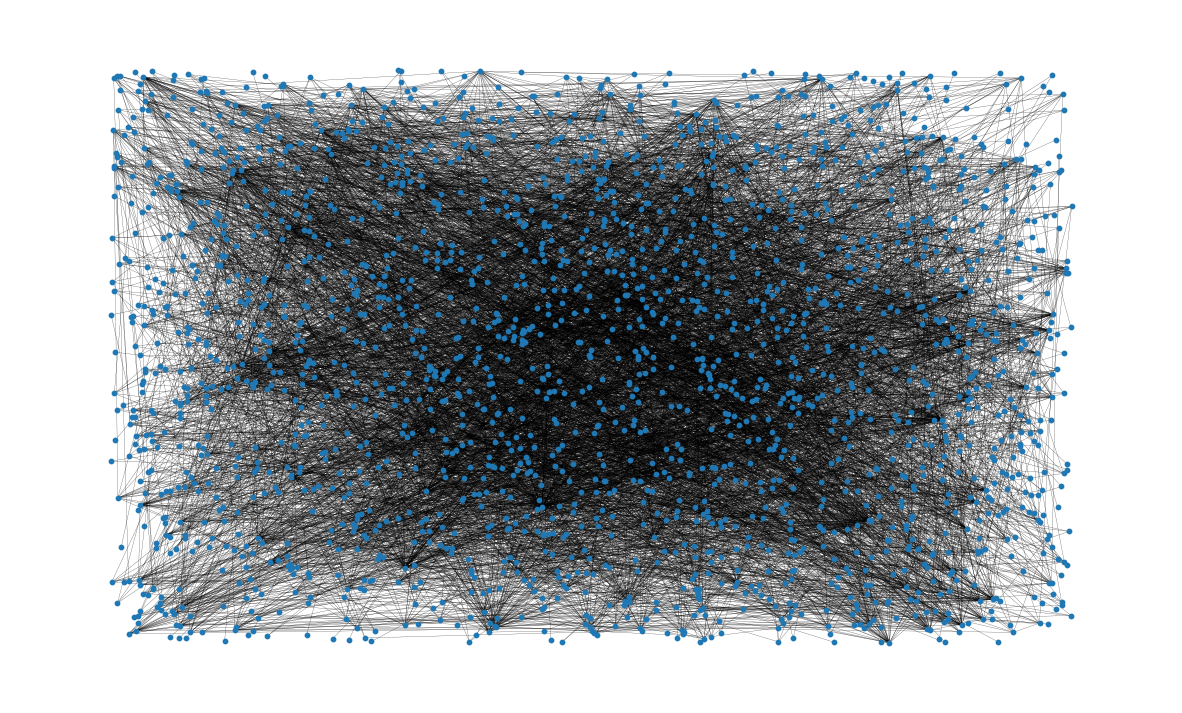

In [ ]:
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
plot_options = {"node_size": 10, "with_labels": False, "width": 0.15}
nx.draw_networkx(G, pos=nx.random_layout(G), ax=ax, **plot_options)

It’s clear that we need to impose more structure on the positioning of the if we want to get a sense for the data. For this, we can use the spring_layout function which is the default layout function for the networkx drawing module. The spring_layout function has the advantage that it takes into account the nodes and edges to compute locations of the nodes. The downside however, is that this process is much more computationally expensive, and can be quite slow for graphs with 100’s of nodes and 1000’s of edges.

Since we don’t have any real sense of structure in the data, let’s start by viewing the graph with random_layout, which is among the fastest of the layout functions.

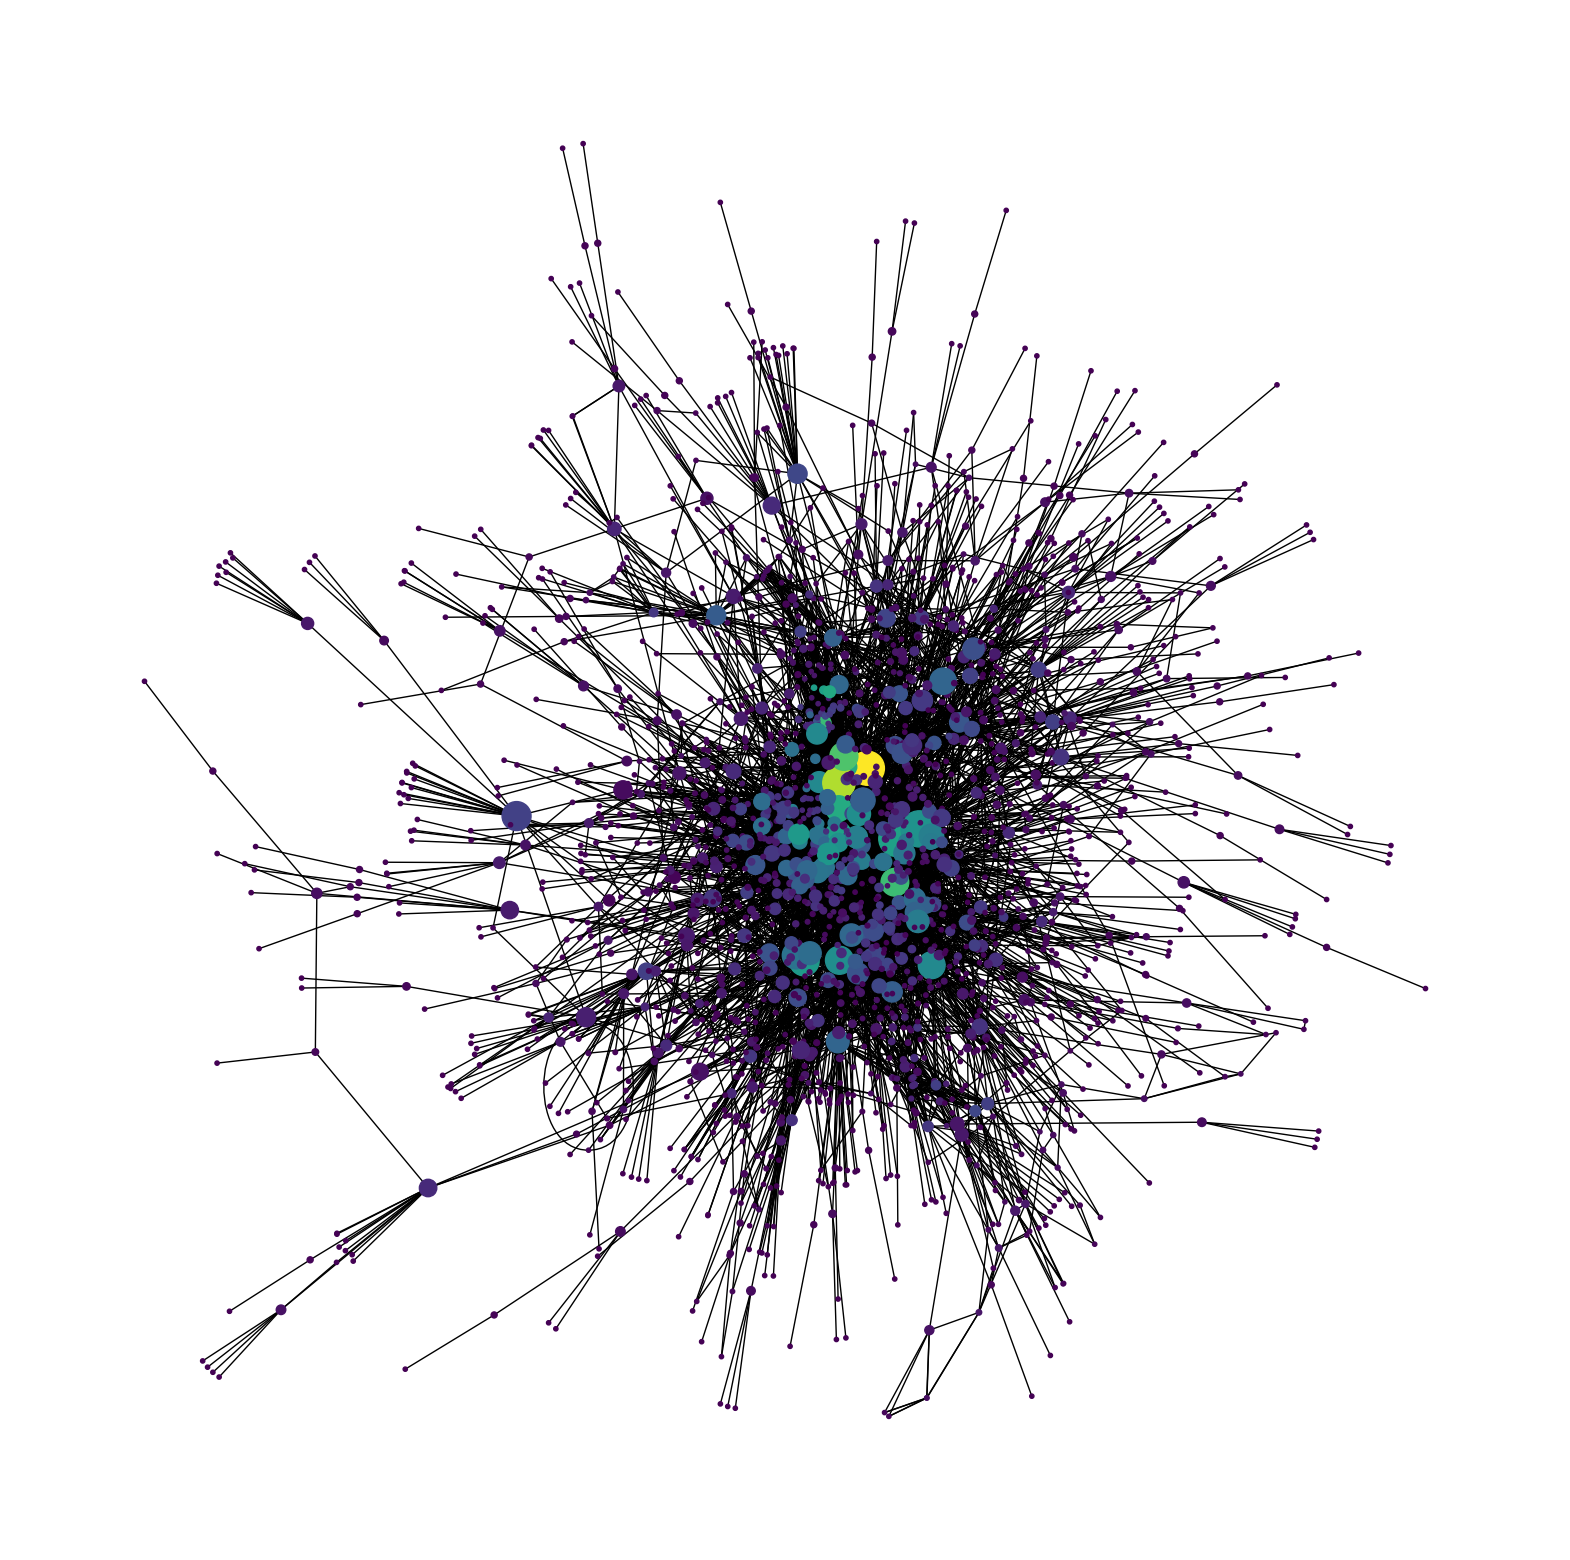

In [ ]:
pos = nx.spring_layout(G)
betCent = nx.betweenness_centrality(G, normalized=True, endpoints=True)
node_color = [20000.0 * G.degree(v) for v in G]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off');

In [ ]:
#Total number of nodes in network
G.number_of_nodes()


2113

In [ ]:
#Total number of edges
G.number_of_edges()

6633

Also, the average degree of a node can be seen.

On average, a node is connected to almost **6.3** other nodes, also known as neighbors of the node.

This has been calculated by creating a list of all the degrees of the nodes and using numpy.array to find the mean of the created list.

In [ ]:
np.mean([d for _, d in G.degree()])

6.278277330809276

We find the nodes with the highest degree centralities. Specifically, the nodes with the 8 highest degree centralities are shown below together with the degree centrality. That means that **node 619**
 has the highest degree centrality with
, meaning that this **ROUTER** is **CONNECTED** with around the **5%** of the whole network.

In [ ]:
degree_centrality = nx.centrality.degree_centrality(G)
(sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True))[:8]

[('619', 0.05160984848484849),
 ('1808', 0.045454545454545456),
 ('50', 0.03740530303030303),
 ('1356', 0.03551136363636364),
 ('18', 0.03503787878787879),
 ('1890', 0.03172348484848485),
 ('1027', 0.03125),
 ('1666', 0.03125)]

(-1.1922666126489638,
 1.0233772093057634,
 -0.9488980746269227,
 1.116243360042572)

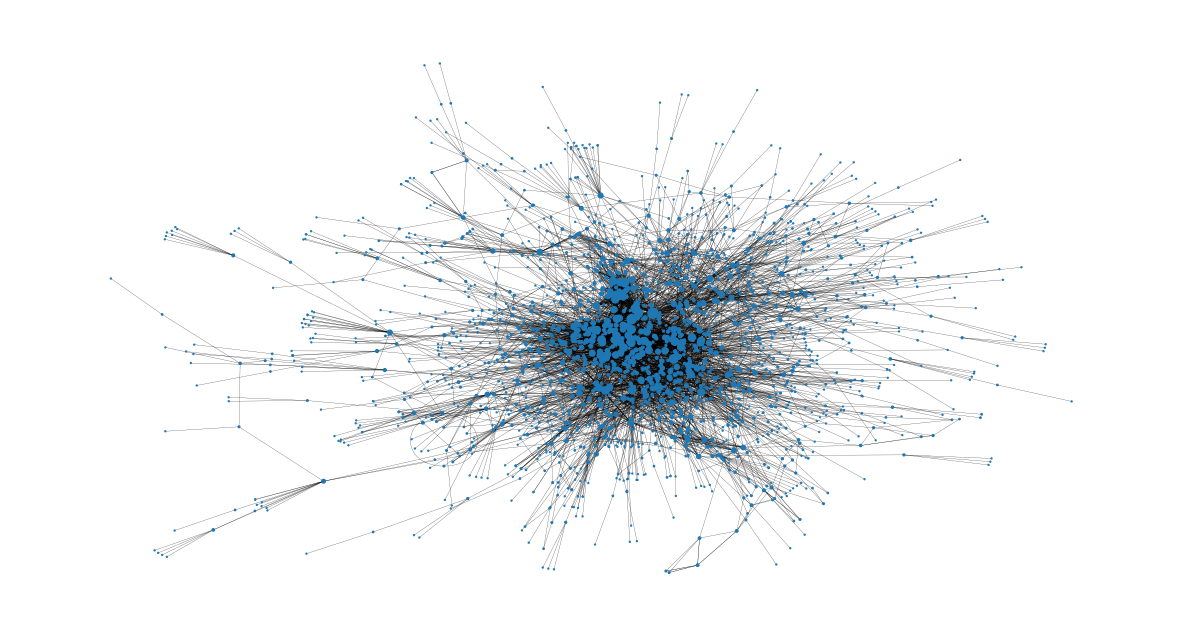

In [ ]:
node_size = [
    v * 1000 for v in degree_centrality.values()
]  # set up nodes size for a nice graph representation
plt.figure(figsize=(15, 8))
nx.draw_networkx(G, pos=pos, node_size=node_size, with_labels=False, width=0.15)
plt.axis("off")

Betweenness centrality measures the number of times a node lies on the shortest path between other nodes, meaning it acts as a bridge. In detail, betweenness centrality of a node
 is the percentage of all the shortest paths of any two nodes (apart from
), which pass through.

In [ ]:
betweenness_centrality = nx.centrality.betweenness_centrality(
    G
)  # save results in a variable to use again
(sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True))[:8]

[('698', 0.06678050192458833),
 ('464', 0.06449066773959432),
 ('619', 0.05927252969906005),
 ('1808', 0.05343440143648722),
 ('155', 0.045065045469175447),
 ('1502', 0.042502912747810866),
 ('614', 0.039719472809803966),
 ('50', 0.03950085740183382)]

(-1.0997555884718895,
 1.199524286687374,
 -1.101546466052532,
 1.0642527338862418)

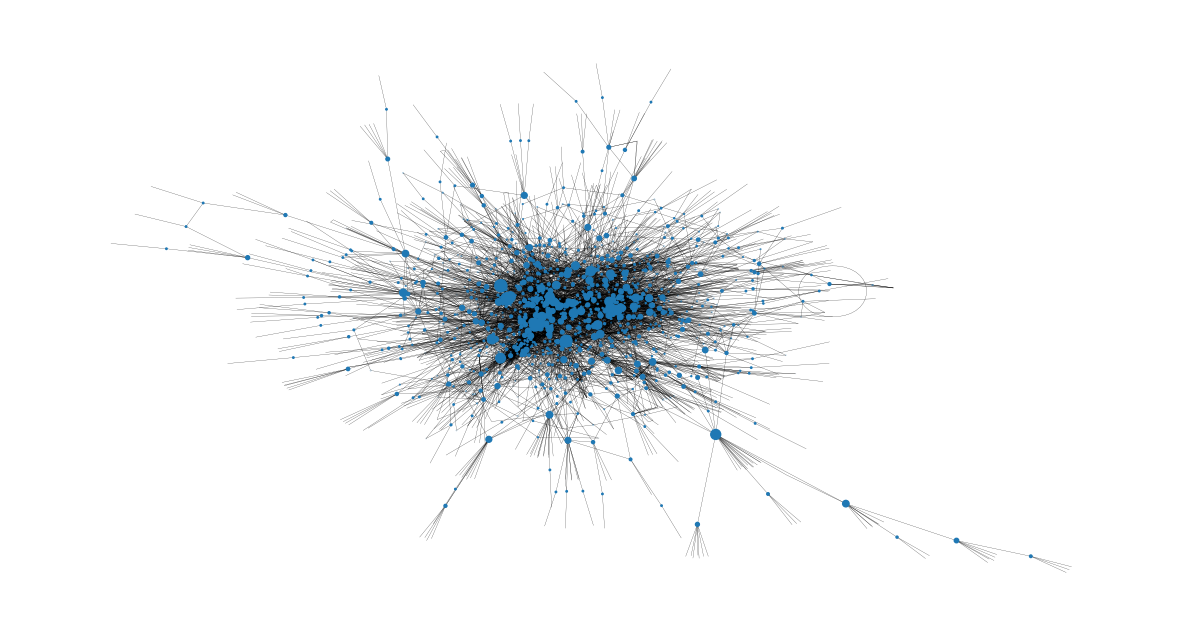

In [ ]:
node_size = [
    v * 1200 for v in betweenness_centrality.values()
]  # set up nodes size for a nice graph representation
plt.figure(figsize=(15, 8))
nx.draw_networkx(G, pos=pos, node_size=node_size, with_labels=False, width=0.15)
plt.axis("off")

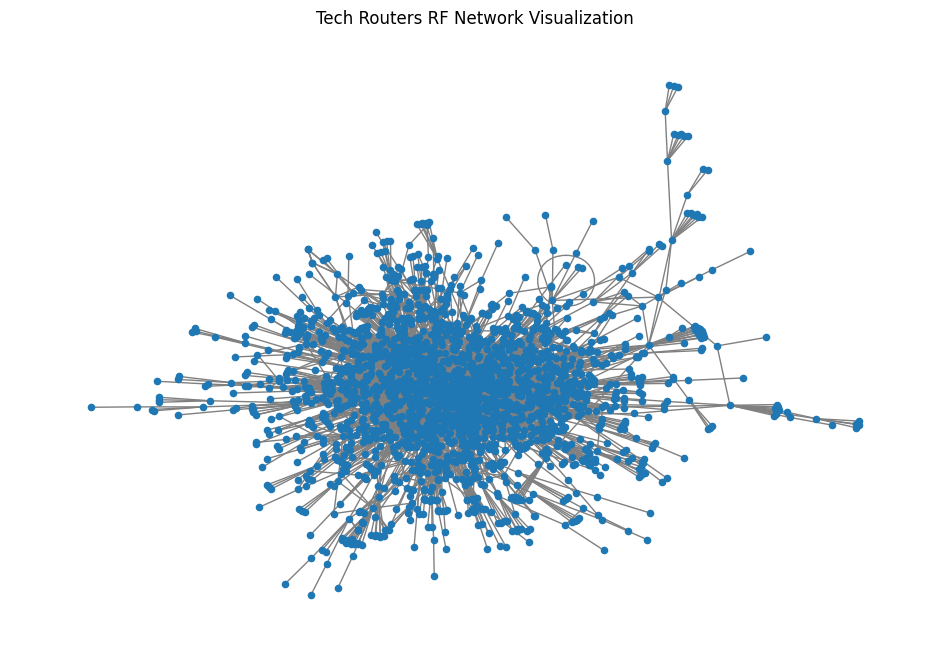

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Assuming 'G' is your NetworkX graph object
plt.figure(figsize=(12, 8))
nx.draw_networkx(G, with_labels=False, node_size=20, edge_color='gray')
plt.title('Tech Routers RF Network Visualization')
plt.axis('off')  # Hide the axes
plt.show()


<ipython-input-18-5a0afd0e7d5a>:5: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.nx_pydot.graphviz_layout(G,prog="fdp")


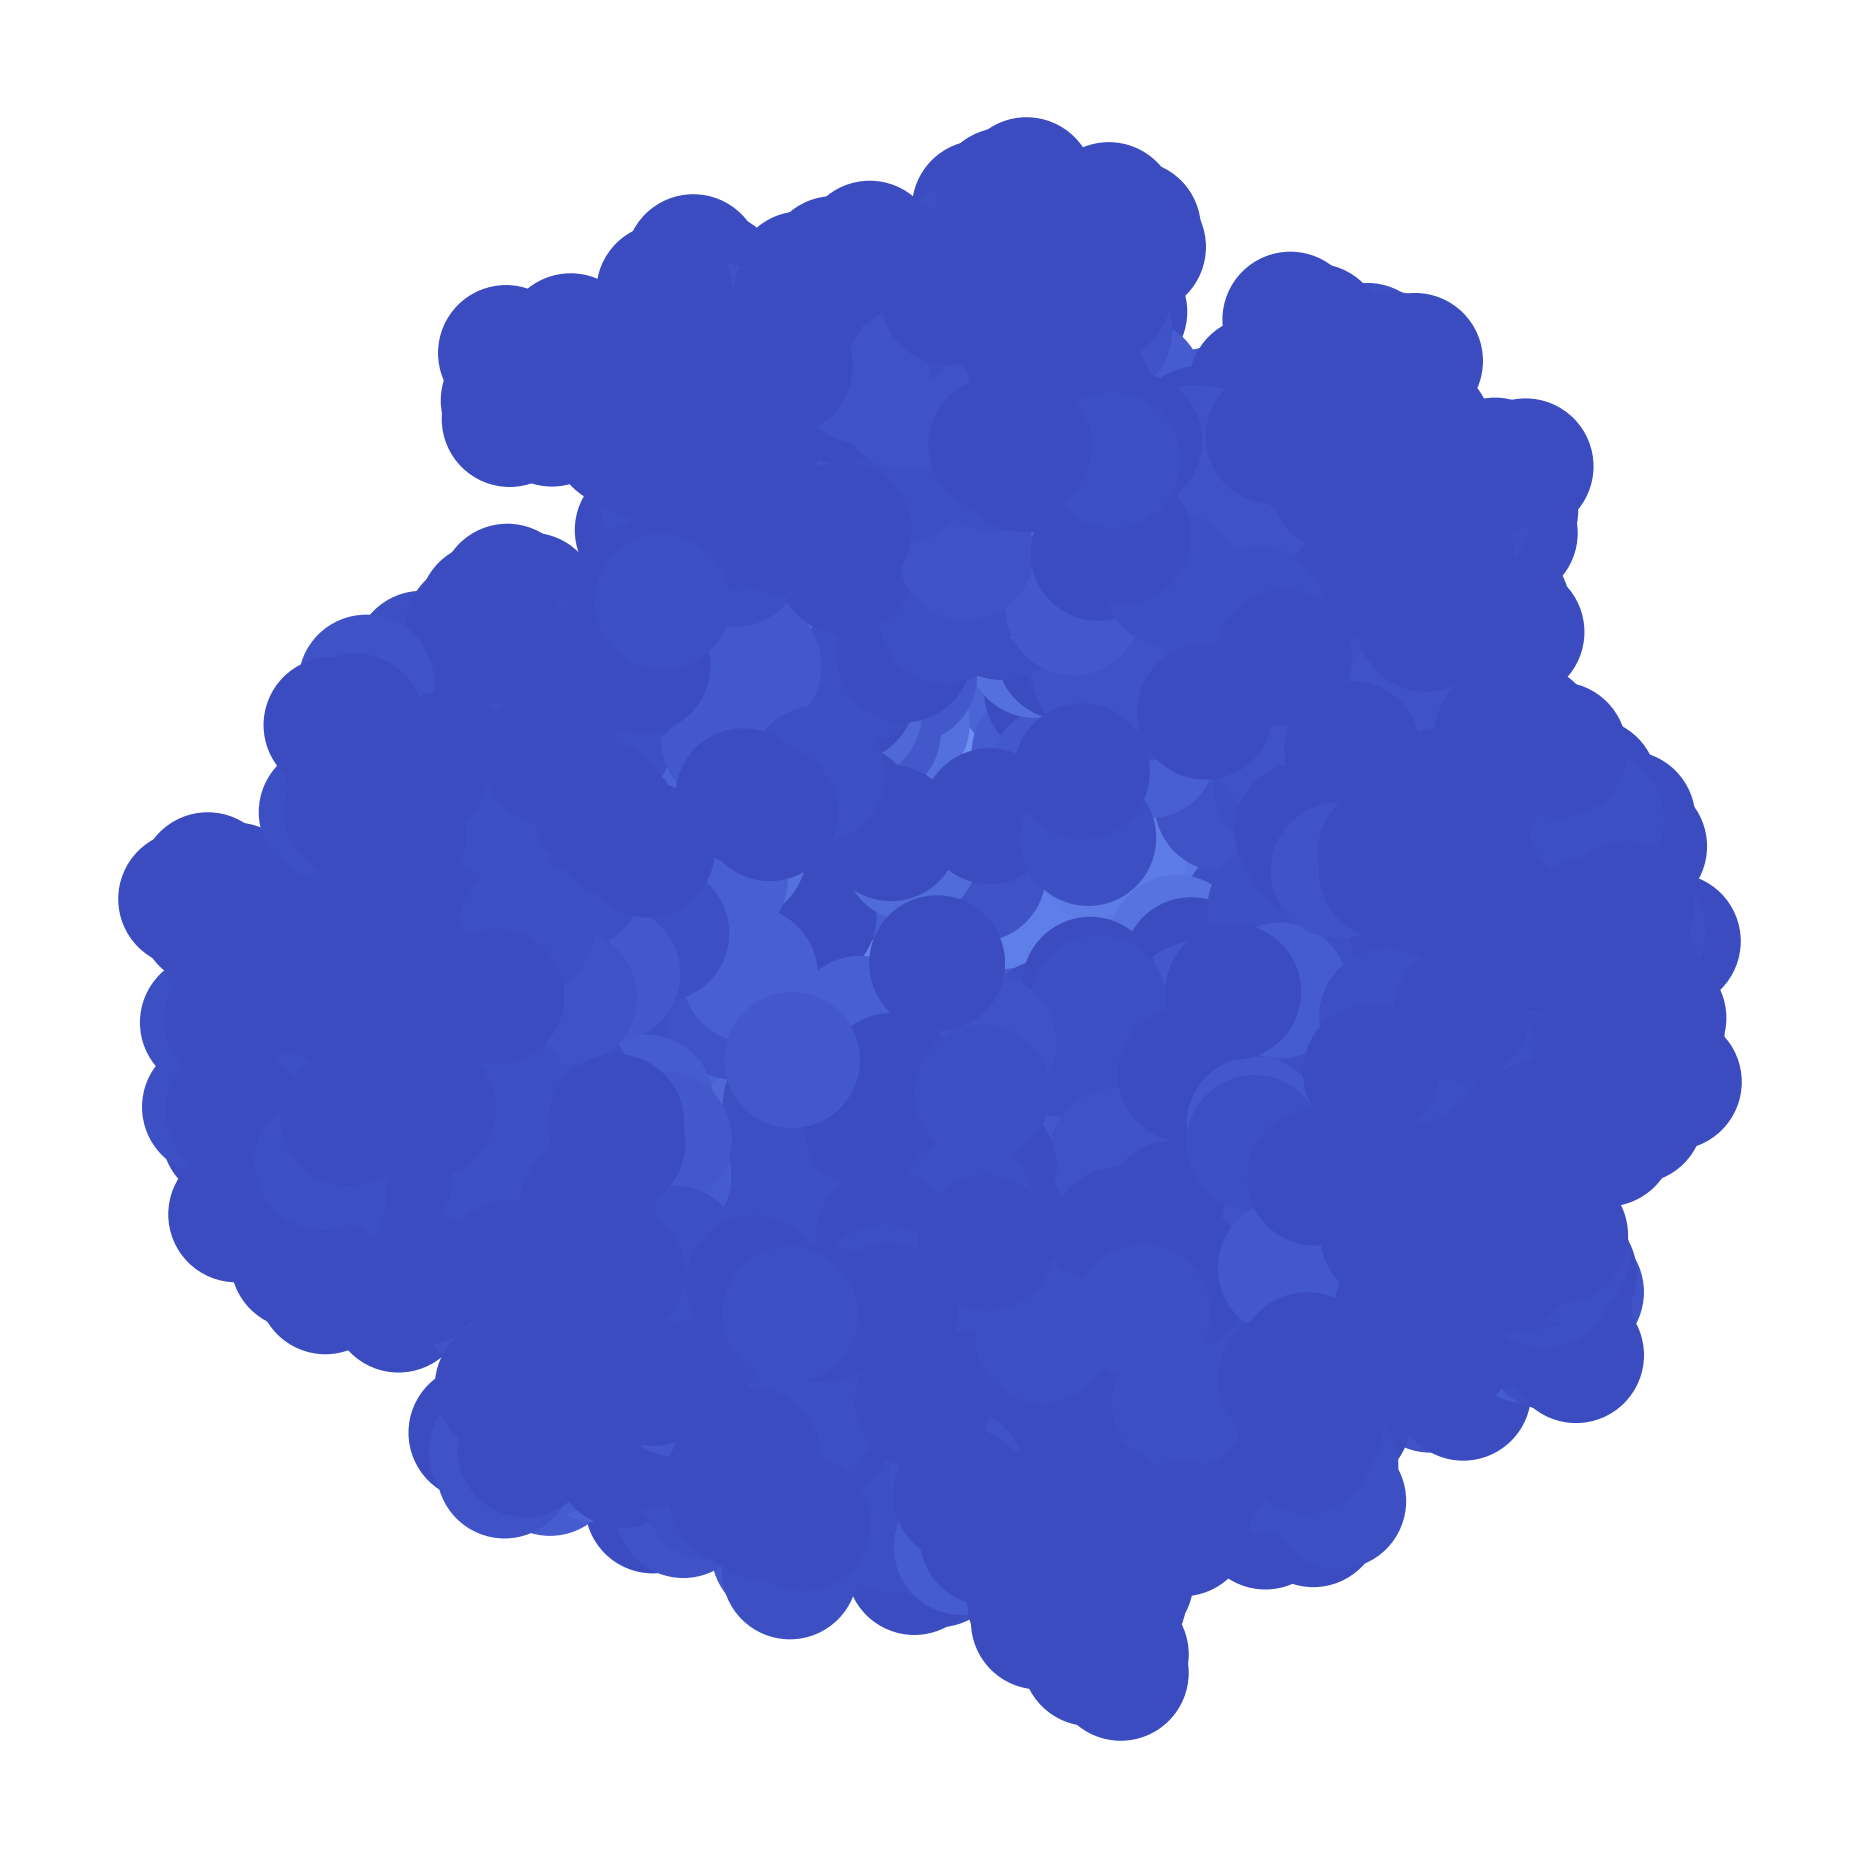

In [ ]:
node_color=[float(G.degree(v)) for v in G]
cmap = plt.cm.coolwarm

plt.figure(figsize=(6,6), dpi=300)
pos = nx.nx_pydot.graphviz_layout(G,prog="fdp")
nx.draw(G, pos, node_color=node_color, node_size=1000, edge_color='k',
        width=3, with_labels=False, cmap=cmap)

plt.show()

In [ ]:
# Graph Density
nx.density(G)

0.002972669190724089

In [ ]:
# Average Shortest Path Lenght
nx.average_shortest_path_length(G)

4.607423471582842

In [ ]:
nx.diameter(G)

12

<ipython-input-19-cdd095978dd5>:2: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.nx_pydot.graphviz_layout(G,prog="dot")


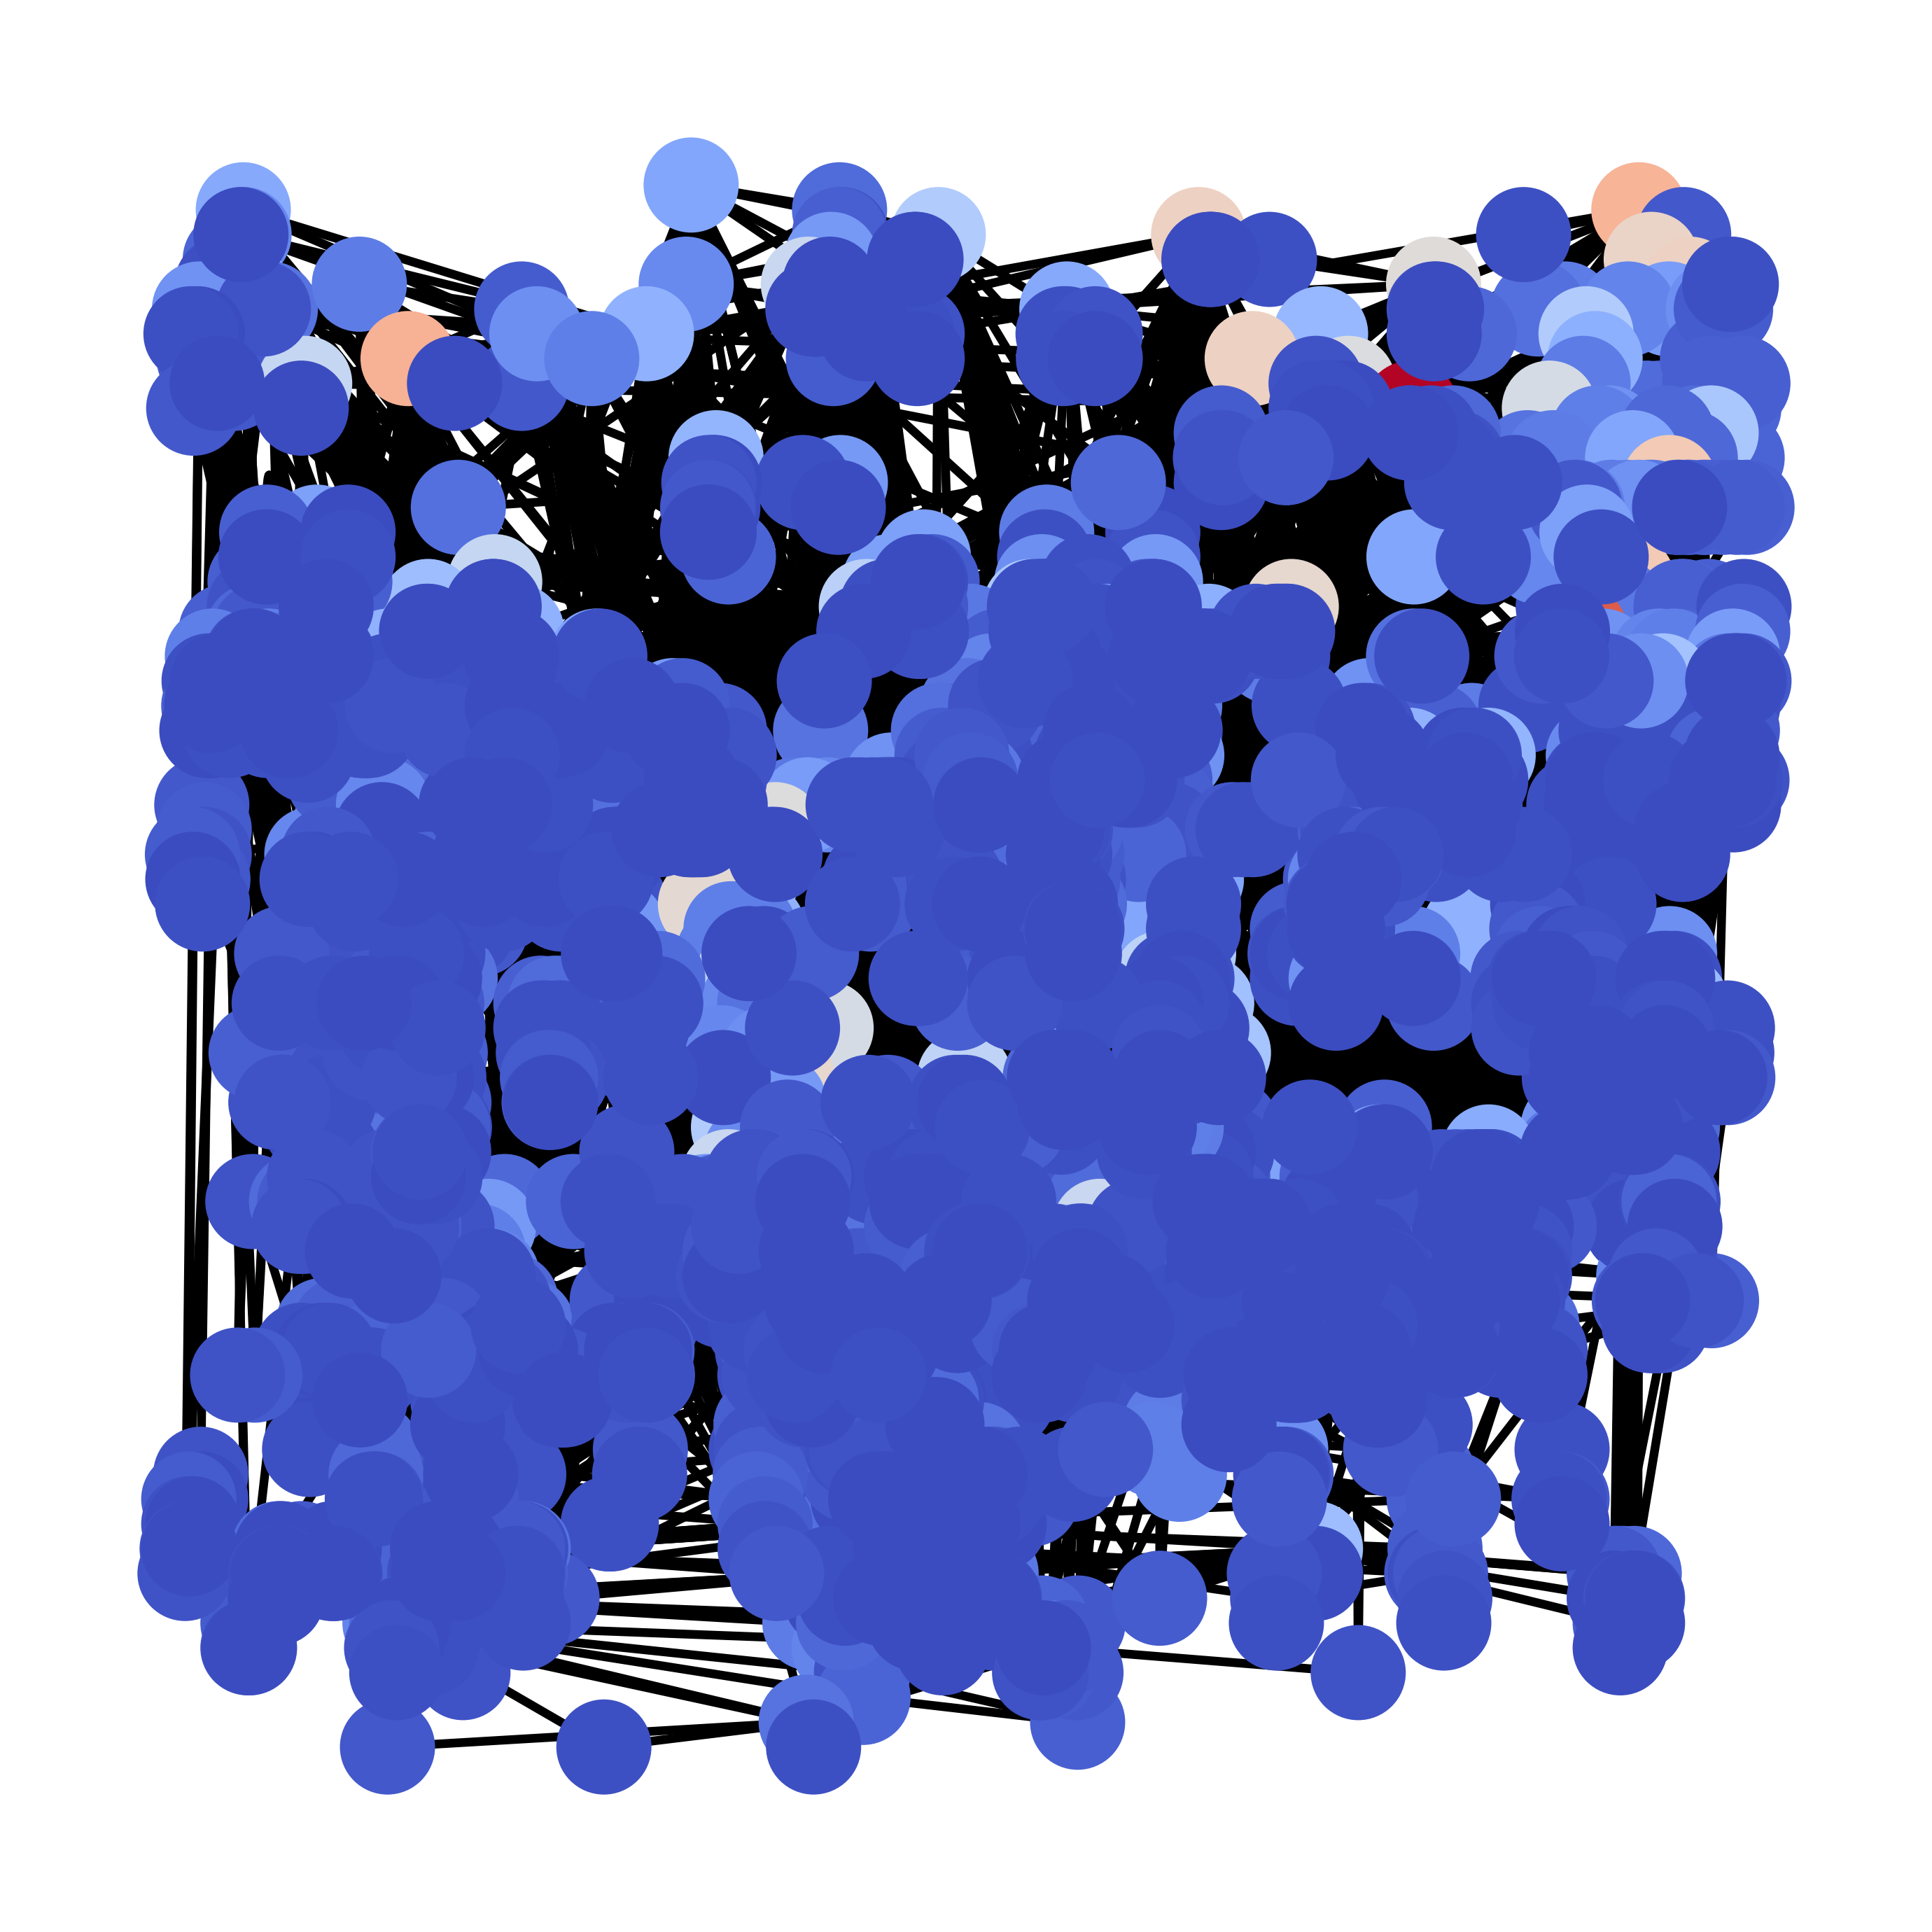

In [ ]:
plt.figure(figsize=(9,9), dpi=300)
pos = nx.nx_pydot.graphviz_layout(G,prog="dot")
nx.draw(G, pos, node_color=node_color, node_size=1000, edge_color='k',
        width=3, with_labels=False, cmap=cmap)

plt.show()

In [ ]:
# Community Detection using Modularity
from networkx.algorithms.community import greedy_modularity_communities
greedy_modularity_communities(G)

[frozenset({'1',
            '1000',
            '1003',
            '1005',
            '1007',
            '1012',
            '1015',
            '1021',
            '1031',
            '1037',
            '104',
            '105',
            '1059',
            '1064',
            '1078',
            '1079',
            '1082',
            '1087',
            '1089',
            '1100',
            '1103',
            '1107',
            '1108',
            '1109',
            '1110',
            '1121',
            '1124',
            '114',
            '1140',
            '1143',
            '1149',
            '1153',
            '1155',
            '1161',
            '1163',
            '1165',
            '117',
            '1175',
            '1179',
            '1181',
            '120',
            '1200',
            '1204',
            '1206',
            '1208',
            '1211',
            '1212',
            '1214',
            '1224',
            '1225',
        

In [ ]:
print (list(nx.find_cliques(G)))

[['1408', '1378'], ['1408', '297'], ['1573', '279'], ['1595', '16'], ['1595', '2053', '1554'], ['1114', '2042'], ['1278', '1624'], ['924', '643'], ['835', '462'], ['1989', '1009'], ['1989', '1411'], ['1989', '1550'], ['1989', '468'], ['1989', '930'], ['1989', '1607'], ['2070', '31'], ['2070', '1477'], ['1772', '513'], ['1060', '1801'], ['987', '1850', '1127', '1303'], ['987', '1850', '1127', '1290'], ['987', '1850', '1127', '120'], ['987', '1850', '277'], ['987', '1850', '803'], ['987', '1850', '160'], ['987', '1850', '1460'], ['987', '1850', '1279'], ['987', '1850', '904'], ['987', '1850', '1537', '1290'], ['987', '1850', '1537', '120'], ['987', '1850', '1286'], ['987', '1347'], ['987', '1103'], ['542', '1099'], ['542', '418'], ['91', '451'], ['1589', '1727'], ['2106', '1347'], ['766', '1483', '157'], ['766', '1023'], ['750', '257', '464'], ['1689', '1296'], ['1568', '2083', '1623', '1849', '1761', '1810'], ['1568', '2083', '1623', '1849', '1761', '165'], ['1568', '513', '1849', '1810

\Now, we know that in the Girvan-Newman method, the edges of the graph are eliminated one-by-one based on the EBC score. So, the first task is to find the EBC values for all the edges and then take off the edge with the largest value. The below function performs the exact task:

In [ ]:
def edge_to_remove(graph):
  G_dict = nx.edge_betweenness_centrality(graph)
  edge = ()

  # extract the edge with highest edge betweenness centrality score
  for key, value in sorted(G_dict.items(), key=lambda item: item[1], reverse = True):
      edge = key
      break
  return edge

In [ ]:
def girvan_newman(graph):
	# find number of connected components
	sg = nx.connected_components(graph)
	sg_count = nx.number_connected_components(graph)

	while(sg_count == 1):
		graph.remove_edge(edge_to_remove(graph)[0], edge_to_remove(graph)[1])
		sg = nx.connected_components(graph)
		sg_count = nx.number_connected_components(graph)

	return sg

In [ ]:
# find communities in the graph
c = girvan_newman(G.copy())

# find the nodes forming the communities
node_groups = []

for i in c:
  node_groups.append(list(i))

In [ ]:
node_groups
number_of_communities = len(node_groups)
print("Number of communities detected:", number_of_communities)

Number of communities detected: 2


In [ ]:
# Define the layout for your nodes
pos = nx.spring_layout(G)  # or any other layout algorithm like nx.kamada_kawai_layout(G)

# Define the color map based on a characteristic like community membership
color_map = ['green' if your_condition(node) else 'blue' for node in G]

# Define the node sizes based on a property such as degree
node_sizes = [100 * G.degree(n) for n in G.nodes()]

# Now you can draw your graph with the node sizes
nx.draw(G, pos, node_color=color_map, with_labels=False, node_size=node_sizes)

# Assuming you're running this in a Jupyter notebook, show the plot
plt.show()

NameError: name 'your_condition' is not defined

NameError: name 'pos' is not defined

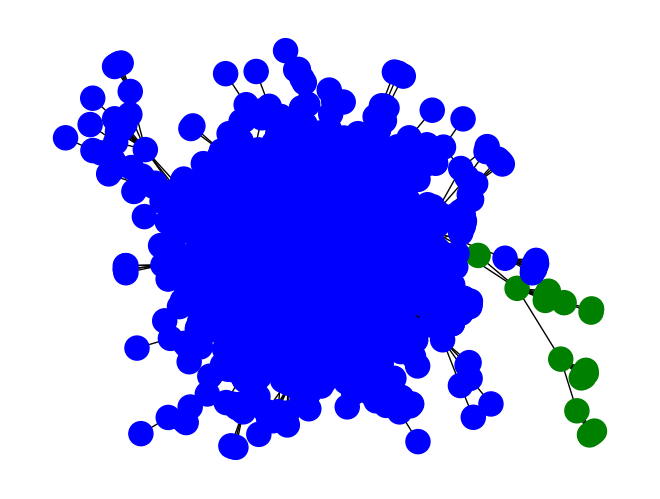

In [ ]:
# plot the communities
color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append('blue')
    else:
        color_map.append('green')

nx.draw(G, node_color=color_map, with_labels=False)
node_sizes = [100 * G.degree(n) for n in G.nodes()]
nx.draw(G, pos, node_color=color_map, with_labels=False, node_size=node_sizes)

#nx.draw_networkx_nodes(G, pos, node_color=color_map, node_shape='s')  # 's' for square, 'o' for circle, etc.

plt.show()

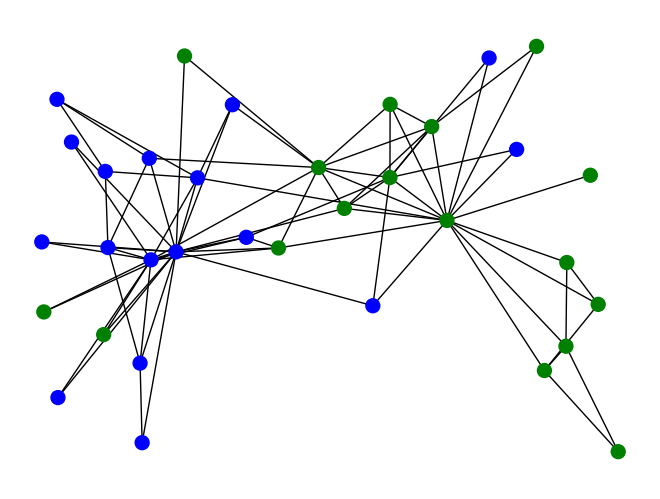

In [ ]:

# Create a networkx graph object 'G' and the 'node_groups'
node_groups = {'group1': set(range(0, len(G)//2)), 'group2': set(range(len(G)//2, len(G)))}

# Generate the position layout for the graph
pos = nx.spring_layout(G)

# Draw the graph with node color by group
node_color = ['green' if node in node_groups['group1'] else 'blue' for node in G]
nx.draw(G, pos, node_color=node_color, with_labels=False, node_size=100)


# Adjust the plot limits
plt.xlim(min(p[0] for p in pos.values())-0.1, max(p[0] for p in pos.values())+0.1)
plt.ylim(min(p[1] for p in pos.values())-0.1, max(p[1] for p in pos.values())+0.1)

# Remove axis for better aesthetics
plt.axis('off')

# Show the plot with nodes encircled
plt.show()


In [ ]:
!pip uninstall community
!pip uninstall python-louvain


Found existing installation: community 1.0.0b1
Uninstalling community-1.0.0b1:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/community-1.0.0b1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/community/*
  Would not remove (might be manually added):
    /usr/local/lib/python3.10/dist-packages/community/community_louvain.py
    /usr/local/lib/python3.10/dist-packages/community/community_status.py
Proceed (Y/n)? ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/uninstall.py", line 105, in run
    uninstall_pathset = req.uninstall(
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/req/req_install.py", line 680, in uninstall
    uninstalled_pathset.remove(auto_confirm, verbose)
  File "/usr/local/lib/python3.10/dist-packages

In [ ]:
!pip install networkx matplotlib python-louvain

In [ ]:
!pip install python-louvain


In [ ]:
import networkx as nx
import community as community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [ ]:
import community as community_louvain

# Your graph 'G' needs to be defined before this code

partition = community_louvain.best_partition(G)



AttributeError: module 'community' has no attribute 'best_partition'

In [ ]:
import community as community_louvain
# Compute the best partition using the Louvain algorithm
partition = community_louvain.best_partition(G)

# Draw the graph
plt.figure(figsize=(8, 8))
# Generate a color map where the color of each node depends on its partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=100,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()


AttributeError: module 'community' has no attribute 'best_partition'